In [1]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

cs_april_weather = [11, 18, 21, 21, 22, 27, 28, 30, 30, 30, 32, 30, 22, 19, 14, 13, 13, 20, 20, 23, 29, 26, 29, 31, 26, 29, 26, 26, 26, 25]
print(len(cs_april_weather))

30


In [2]:
# 假设今天是4月13号
X = np.asarray(range(13)).reshape(-1,1)
y = np.asarray(cs_april_weather[0:13]).reshape(-1,1)

(0.0, 40.0)

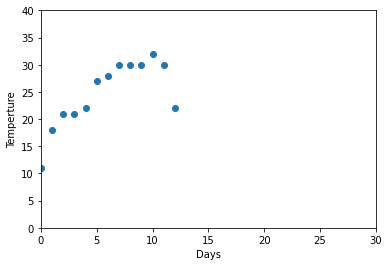

In [3]:
plt.figure()
plt.scatter(X, y)
plt.xlabel('Days')
plt.ylabel('Temperture')

plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymin = 0, ymax = 40)

In [4]:
model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)

[[1.18681319]] [17.64835165]


(0.0, 40.0)

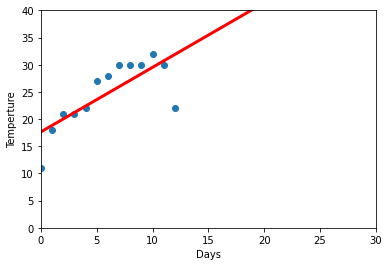

In [5]:
plt.figure()

illu_X = np.asarray(range(30)).reshape(-1,1)

plt.plot(illu_X ,model.predict(illu_X) ,color='red',linewidth =3)
plt.scatter(X, y)
plt.xlabel('Days')
plt.ylabel('Temperture')

plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymin = 0, ymax = 40)

In [6]:
# 4月14日的预测气温
model.predict(np.array([13]).reshape(-1,1))

array([[33.07692308]])

In [7]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_model = PolynomialFeatures(degree=2) 
quadratic_model.fit(X, y)

PolynomialFeatures()

(0.0, 40.0)

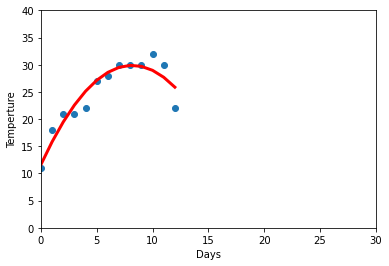

In [8]:
plt.figure()

illu_X = np.asarray(range(30)).reshape(-1,1)

XX = quadratic_model.transform(X)
model.fit(XX, y)

plt.plot(X ,model.predict(XX) ,color='red',linewidth =3)
plt.scatter(X, y)
plt.xlabel('Days')
plt.ylabel('Temperture')

plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymin = 0, ymax = 40)

In [9]:
target_XX = quadratic_model.transform(np.array([13]).reshape(-1,1))
model.predict(target_XX)

array([[23.4965035]])

In [10]:
# 模型对数据的描述能力
model.fit(X,y)
print('Linear Model r2 score: %.3f' % r2_score(y,model.predict(X)))

model.fit(XX, y)
print('Quadratic Model r2 score: %.3f' % r2_score(y,model.predict(XX)))

Linear Model r2 score: 0.562
Quadratic Model r2 score: 0.891


In [11]:
model.coef_
model.intercept_

array([[ 0.        ,  4.47152847, -0.27372627]])

(0.0, 40.0)

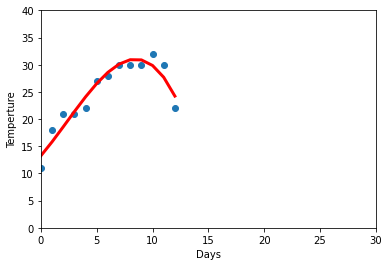

In [13]:
cubic_model = PolynomialFeatures(degree=3) 
cubic_model.fit(X, y)

plt.figure()

illu_X = np.asarray(range(30)).reshape(-1,1)

XXX = cubic_model.transform(X)
model.fit(XXX, y)

plt.plot(X ,model.predict(XXX) ,color='red',linewidth =3)
plt.scatter(X, y)
plt.xlabel('Days')
plt.ylabel('Temperture')

plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymin = 0, ymax = 40)

In [16]:
print(model.coef_, model.intercept_)

[[ 0.          2.41587579  0.17207792 -0.0247669 ]] [13.26098901]


In [14]:
# 模型对数据的描述能力
model.fit(X,y)
print('Linear Model r2 score: %.3f' % r2_score(y,model.predict(X)))

model.fit(XX, y)
print('Quadratic Model r2 score: %.3f' % r2_score(y,model.predict(XX)))

model.fit(XXX, y)
print('Quadratic Model r2 score: %.3f' % r2_score(y,model.predict(XXX)))

Linear Model r2 score: 0.562
Quadratic Model r2 score: 0.891
Quadratic Model r2 score: 0.918


作业1. 采用更高阶的多项式拟合4月份1-25日数据，并预测26-30日最高气温。分别计算这五日预测值和真实值的RMSE、MAE和MSE，并绘制阶数和各个指标的变化曲线。
阶数：从1-20.
变化曲线坐标示意
RMSE  ^
      |
      |
      |
      |----------------------->degree   

MAE   ^
      |
      |
      |
      |----------------------->degree

MSE   ^
      |
      |
      |
      |----------------------->degree

作业2.利用de Boor-Cox递推公式绘制B样条并可视化。